# Coding the Humanities 

## Sample class on "Named Entity Recognition for Humanities Research"

**Instructor Name:** Luciano Frizzera
**Date:** Jan 14, 2026

---

This notebook will guide you through analyzing a text corpus using Named Entity Recognition (NER). You'll extract entities, visualize patterns, and critically reflect on what this method reveals and conceals.

#### Before You Start:
1. Make sure you've installed the required libraries (see cell below)
2. Read through all instructions before running code
3. Don't hesitate to experiment and modify the code!

---
## Section 1: Setup and Installation

### Installation Instructions

We're using spaCy's pre-trained English model. Two options:
- **en_core_web_sm**: Smaller, faster, less accurate (~13MB)
- **en_core_web_lg**: Larger, slower, more accurate (~560MB)

For this assignment, the small model is fine!

Before running this cell, make sure you have installed the required libraries and downloaded the model.

```bash
pip install spacy pandas matplotlib seaborn networkx
python -m spacy download en_core_web_sm
```

**If you want the larger, more accurate model:**
```bash
python -m spacy download en_core_web_lg
```

In [4]:
# Import required libraries
import spacy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


### Load NER Model

We're using spaCy's pre-trained English model. Two options:
- **en_core_web_sm**: Smaller, faster, less accurate (~13MB)
- **en_core_web_lg**: Larger, slower, more accurate (~560MB)

For this assignment, the small model is fine!

If you get errors when running this cell, check the instructions above and double check if you have installed the model.

In [5]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# experiment with a larger model. Comment out the line below to use it. Make sure you have downloaded it first.
# nlp = spacy.load("en_core_web_lg")

# spaCy has support for many languages. You can find a list of supported languages here: https://spacy.io/models

# Let's test it on a sample sentence
test_sentence = "Alberto Santos-Dumont designed, built, and flew the first powered airships and won the Deutsch prize in 1901, when he flew around the Eiffel Tower in his airship No. 6, becoming one of the most famous people in the world in the early 20th century."
doc = nlp(test_sentence)

print("Testing NER on sample sentence:")
print(f"Text: {test_sentence}\n")
print("Entities found:")

for ent in doc.ents:
    print(f"  {ent.text:20} → {ent.label_:15} ({spacy.explain(ent.label_)})")

print("\n✓ NER model loaded and tested successfully!")

Testing NER on sample sentence:
Text: Alberto Santos-Dumont designed, built, and flew the first powered airships and won the Deutsch prize in 1901, when he flew around the Eiffel Tower in his airship No. 6, becoming one of the most famous people in the world in the early 20th century.

Entities found:
  Alberto Santos-Dumont → PERSON          (People, including fictional)
  first                → ORDINAL         ("first", "second", etc.)
  Deutsch              → PERSON          (People, including fictional)
  1901                 → DATE            (Absolute or relative dates or periods)
  the Eiffel Tower     → LOC             (Non-GPE locations, mountain ranges, bodies of water)
  6                    → CARDINAL        (Numerals that do not fall under another type)
  the early 20th century → DATE            (Absolute or relative dates or periods)

✓ NER model loaded and tested successfully!


---
## Section 2: Load the Corpus

The corpus is on the folder `data/`
It is a CSV file with a collection of over 100 contributions to the 2023 Canadian Public Consultation on Generative AI and Copyright

The data is freely available and was crawled from the Canadian government [Innovation, Science and Economic Development Canada](https://ised-isde.canada.ca/site/strategic-policy-sector/en/marketplace-framework-policy/copyright-policy/submissions-consultation-copyright-age-generative-artificial-intelligence).

In [6]:
# Load corpus into a pandas dataframe
# Some of the columns are empty, so we fill them with empty strings
folder_data = "data/"
df = pd.read_csv(folder_data + 'canada_public_consultation_ai_copyright.csv').fillna("")

## Show first 5 rows
df.head()

,name,contributor_type,technical_evidence,text_and_data_mining,authorship_and_ownership_of_works_generated_by_ai,infringement_and_liability_regarding_ai,comments_and_suggestions
0,Bita Amani,Academic,In addition to various areas of research and d...,The IP Scholars Submission (2021) set out full...,Adopting the position of IP Scholars submissio...,,
1,Sofian Audry,Academic,Je peux parler à l'échelle de ma propre recher...,Un principe général devrait s'appliquer pour l...,,,J'aimerais mettre en garde le gouvernement con...
2,Joel Blit,Academic,,,,,It is clear that in the age of AI we will have...
3,Alissa Centivany and Kailin Rourke,Academic,A NOTE ON TECHNICAL EVIDENCEAs the authors are...,Clarity around copyright and TDM in Canada is ...,"Most, if not all, jurisdictions condition auth...",Infringement and liability can arise in a few ...,This submission was prepared by Dr. Alissa Cen...
4,Carys Craig,Academic,"It is important to note that, in cataloguing t...",Given the vast volume of inputs required as tr...,As explained at length in the IP Scholars’ sub...,Qu.: Are there concerns about existing legal t...,The joint submission of the fourteen Canadian ...


In [7]:
df.tail()  # Last 5 rows

,name,contributor_type,technical_evidence,text_and_data_mining,authorship_and_ownership_of_works_generated_by_ai,infringement_and_liability_regarding_ai,comments_and_suggestions
98,Simon Fraser University,University,Numerous researchers at Simon Fraser Universit...,TDM as an analytical tool involves a non-consu...,"At SFU, the ongoing research and development o...",In Canada it is the courts who determine if co...,"As noted earlier, AI possesses the capacity to..."
99,UNB Libraries and the UNB Legal Innovation Lab...,University,The University of New Brunswick Libraries (UNB...,UNB Libraries have long advocated for clarity ...,UNB Libraries submit that any uncertainty arou...,In the case of AI-assisted or AI-generated con...,Further suggestions- FAIR Principles for data ...
100,Universities Canada,University,Copyright Implications of Generative Artificia...,RecommendationsUniversities Canada has consult...,Canada’s universities and generative AIDespite...,"Authorship, ownership, and infringementA long-...",ConclusionCanada’s universities thank the gove...
101,University of Toronto Libraries (UTL),University,,The University of Toronto Libraries (UTL) than...,Given the ramifications that copyright protect...,As the Copyright Act already addresses infring...,
102,University of Waterloo,University,The University of Waterloo ContextWe appreciat...,TDM Activities and factorsInformal observation...,We recommend that the status quo be maintained...,"At present, the way that many AI systems are t...",Copyright is just one tool in the toolbox for ...


In [8]:
df.describe()  # Descriptive statistics

,name,contributor_type,technical_evidence,text_and_data_mining,authorship_and_ownership_of_works_generated_by_ai,infringement_and_liability_regarding_ai,comments_and_suggestions
count,103,103,103,103,103,103,103
unique,103,12,79,97,83,79,78
top,Bita Amani,Association,,,,,
freq,1,32,24,7,21,25,26


In [9]:
## The content is spread out in several colums. Lets put all the text in a single column 
df['full_text'] = df['technical_evidence'] + ' ' + df['text_and_data_mining'] + ' ' + df['authorship_and_ownership_of_works_generated_by_ai'] + ' ' + df['infringement_and_liability_regarding_ai'] + ' ' + df['comments_and_suggestions']

In [10]:
# Display information about your corpus
print(f"📚 Corpus loaded: {df.shape[0]} documents")
print(f"📄 Document authors: {', '.join(df['name'].head().to_list())}...")
print(f"📊 Total characters: {int(df['full_text'].str.len().sum()):,}")

📚 Corpus loaded: 103 documents
📄 Document authors: Bita Amani, Sofian Audry, Joel Blit, Alissa Centivany and Kailin Rourke, Carys Craig...
📊 Total characters: 1,555,009


---
## Section 3: Process Corpus with NER

This section processes the entire corpus and extracts all named entities.  
**This might take a few minutes depending on your corpus size!**

In [11]:
print("🔄 Processing corpus with NER... (this may take a moment)")

# Store all entities organized by document and type
entities_by_doc = {}
all_entities = []

# Process each document
for index, row in df.iterrows():
    doc_name = row['name']
    text = row['full_text']
    
    # Process with spaCy
    doc = nlp(text)
    
    # Extract entities
    doc_entities = [(ent.text, ent.label_, ent.start_char , ent.end_char) for ent in doc.ents]
    
    # Store entities
    entities_by_doc[doc_name] = doc_entities
    all_entities.extend([(doc_name, ent[0], ent[1]) for ent in doc_entities])

print(f"✓ Processing complete! Found {len(all_entities):,} total entity mentions")

🔄 Processing corpus with NER... (this may take a moment)
✓ Processing complete! Found 13,093 total entity mentions


In [12]:
# Create a DataFrame for easier analysis
df_entities = pd.DataFrame(all_entities, 
                          columns=['document', 'entity_text', 'entity_type'])

# Display summary statistics
print("📊 Entity Type Distribution:")
print(df_entities['entity_type'].value_counts())

📊 Entity Type Distribution:
entity_type
ORG            4914
GPE            3634
PERSON         1374
NORP            785
CARDINAL        757
DATE            644
LAW             429
ORDINAL         212
WORK_OF_ART     119
PRODUCT          51
FAC              38
MONEY            34
LOC              28
PERCENT          27
EVENT            18
LANGUAGE         13
TIME             10
QUANTITY          6
Name: count, dtype: int64


In [13]:
# Show a sample of extracted entities
# What do you see? Can you spot any errors?

print("🔍 Sample of extracted entities:")
df_entities.head(20)

🔍 Sample of extracted entities:


,document,entity_text,entity_type
0,Bita Amani,AI,ORG
1,Bita Amani,AI,ORG
2,Bita Amani,Canada,GPE
3,Bita Amani,Mata,PERSON
4,Bita Amani,"Avianca, Inc.",ORG
5,Bita Amani,United States,GPE
6,Bita Amani,New York,GPE
7,Bita Amani,2023,DATE
8,Bita Amani,Court,ORG
9,Bita Amani,GenAI,ORG


---
## Section 4: Basic Analysis - Entity Frequencies

Let's find the most frequent entities of each type.

And here a **surprise**: Canada is a bilingual country!

Yes, some of the submisssion are in French and you can see that NER found some French entities.
Though, it's not perfect and it found some entities that are not actually entities or don't belong to a specific entity type, or do they?

In [14]:
# Count entities by type
entity_types = ['PERSON', 'ORG', 'GPE', 'LOC', 'DATE', 'EVENT', 'WORK_OF_ART']

print("=" * 80)
print("TOP ENTITIES BY TYPE")
print("=" * 80)

# Iterate over entity types
for ent_type in entity_types:
    
    # Filter entities by type
    entities_of_type = df_entities[df_entities['entity_type'] == ent_type]
    
    # If there are entities of this type, print them
    if len(entities_of_type) > 0:
        # Get top entities
        top_entities = entities_of_type['entity_text'].value_counts().head(10)
        print(f"\n{ent_type} ({spacy.explain(ent_type)}):")
        print("-" * 60)
        
        # Print top entities 
        for entity, count in top_entities.items():
            print(f"  {entity:30} → {count:4} mentions")

TOP ENTITIES BY TYPE

PERSON (People, including fictional):
------------------------------------------------------------
  Generative AI                  →   72 mentions
  d'IA                           →   46 mentions
  CIMA                           →   27 mentions
  Midjourney                     →   18 mentions
  DiMA                           →   17 mentions
  OpenAI                         →   13 mentions
  activités de FTD               →   11 mentions
  Bill C-27                      →   10 mentions
  Craig                          →   10 mentions
  ce qui                         →   10 mentions

ORG (Companies, agencies, institutions, etc.):
------------------------------------------------------------
  TDM                            →  969 mentions
  AI                             →  853 mentions
  un                             →  154 mentions
  GAI                            →   70 mentions
  Government                     →   60 mentions
  EU                             → 

---
## Section 5: Visualizations

Let's create some visualizations to explore our data.

First lets import the required libraries, set some parameters for our visualizations, and define where to save them.

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import networkx as nx

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create results directory if it doesn't exist
folder_results = "results/"
os.makedirs(folder_results, exist_ok=True)



### Distribution of Entity Types in Corpus

Create visualizations for distribution of entity types.

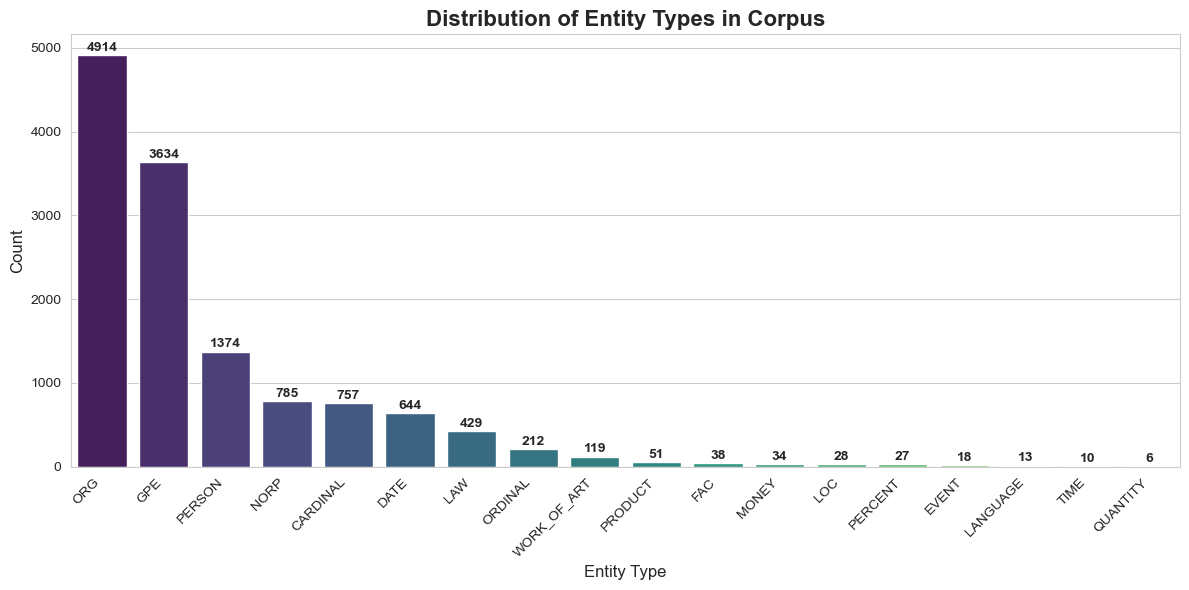

✓ Visualization saved as 'entity_type_distribution.png'


<Figure size 1200x600 with 0 Axes>

In [16]:
# Entity type distribution
entity_counts = df_entities['entity_type'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts.index, y=entity_counts.values, palette='viridis')
plt.title('Distribution of Entity Types in Corpus', fontsize=16, fontweight='bold')
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count labels on bars
for i, v in enumerate(entity_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Save plot
plt.savefig(folder_results +'entity_type_distribution.png', dpi=300, bbox_inches='tight')

print("✓ Visualization saved as 'entity_type_distribution.png'")


### Top Entities by Type

Create visualizations for the most frequent entities in key categories.

In [17]:
# Let first create a resuable function to plot top entities
def plot_top_entities(entity_type, top_n=15):
    """Plot the most frequent entities of a given type."""
    entities_of_type = df_entities[df_entities['entity_type'] == entity_type]
    
    # Check if there are any entities of this type
    if len(entities_of_type) == 0:
        print(f"No entities of type {entity_type} found.")
        return
    
    # Get the top N entities
    top_entities = entities_of_type['entity_text'].value_counts().head(top_n)
    
    # Plot the top entities
    plt.figure(figsize=(10, 8))
    sns.barplot(y=top_entities.index, x=top_entities.values, palette='rocket')
    plt.title(f'Top {top_n} Most Frequent {entity_type} Entities', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Frequency', fontsize=11)
    plt.ylabel('Entity', fontsize=11)
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()
    
    # Save the plot
    filename = f'top_{entity_type.lower()}_entities.png'
    plt.savefig(folder_results + filename, dpi=300, bbox_inches='tight')
    
    print(f"✓ Visualization saved as '{filename}'")

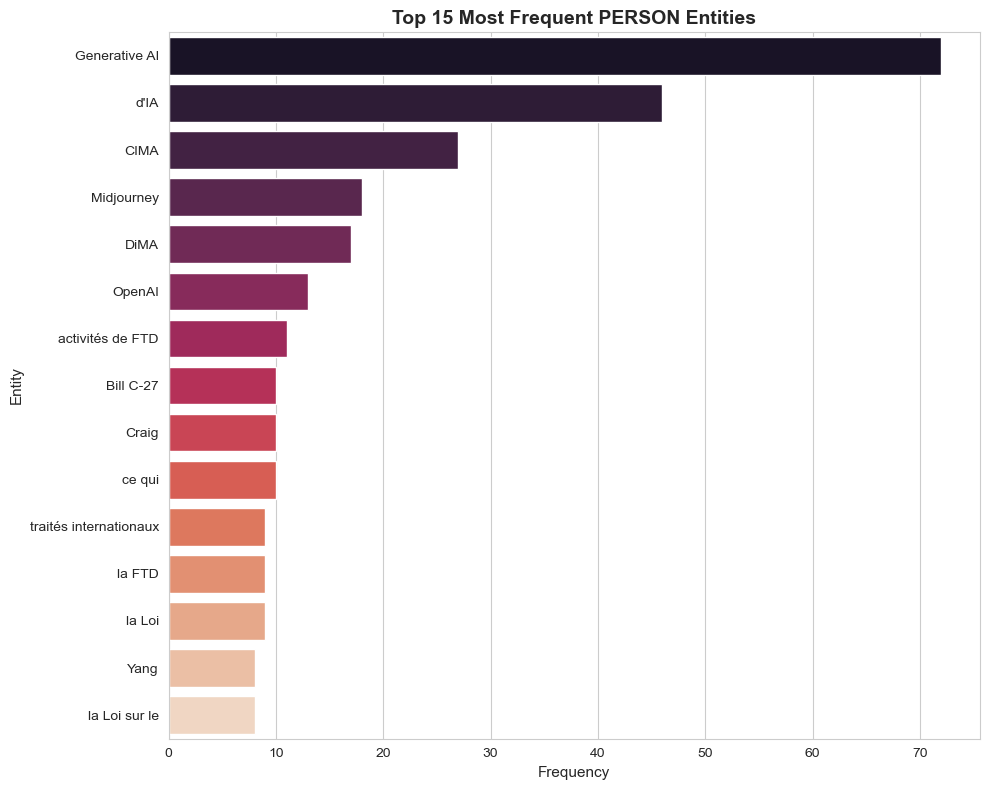

✓ Visualization saved as 'top_person_entities.png'


<Figure size 1200x600 with 0 Axes>

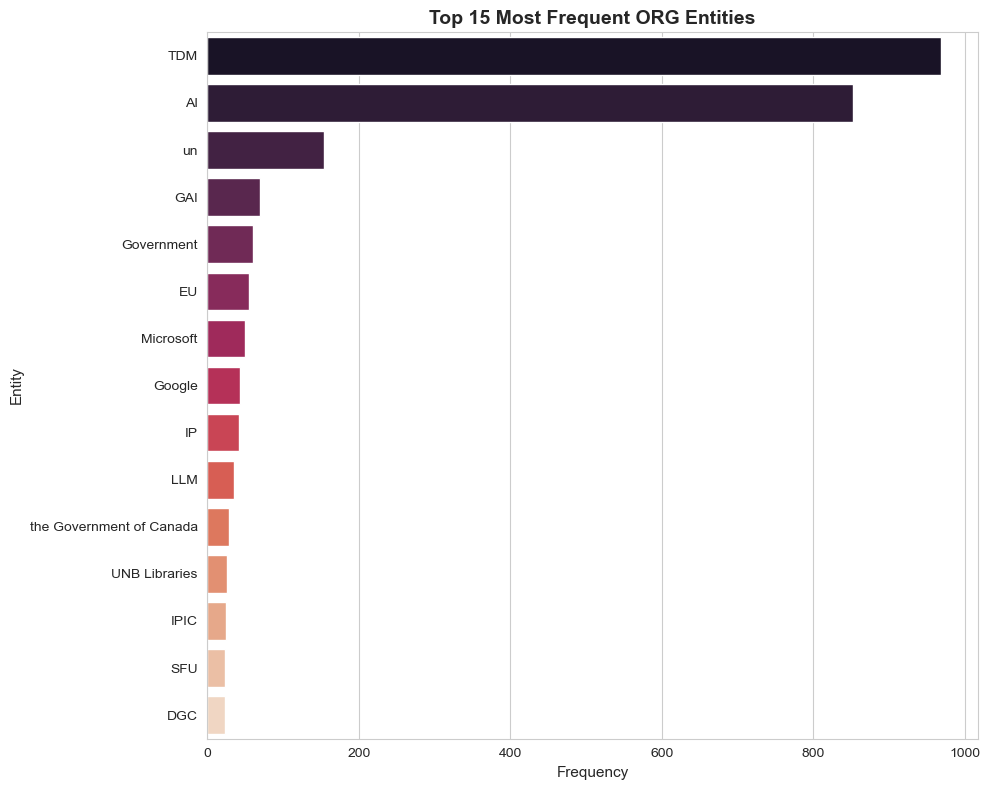

✓ Visualization saved as 'top_org_entities.png'


<Figure size 1200x600 with 0 Axes>

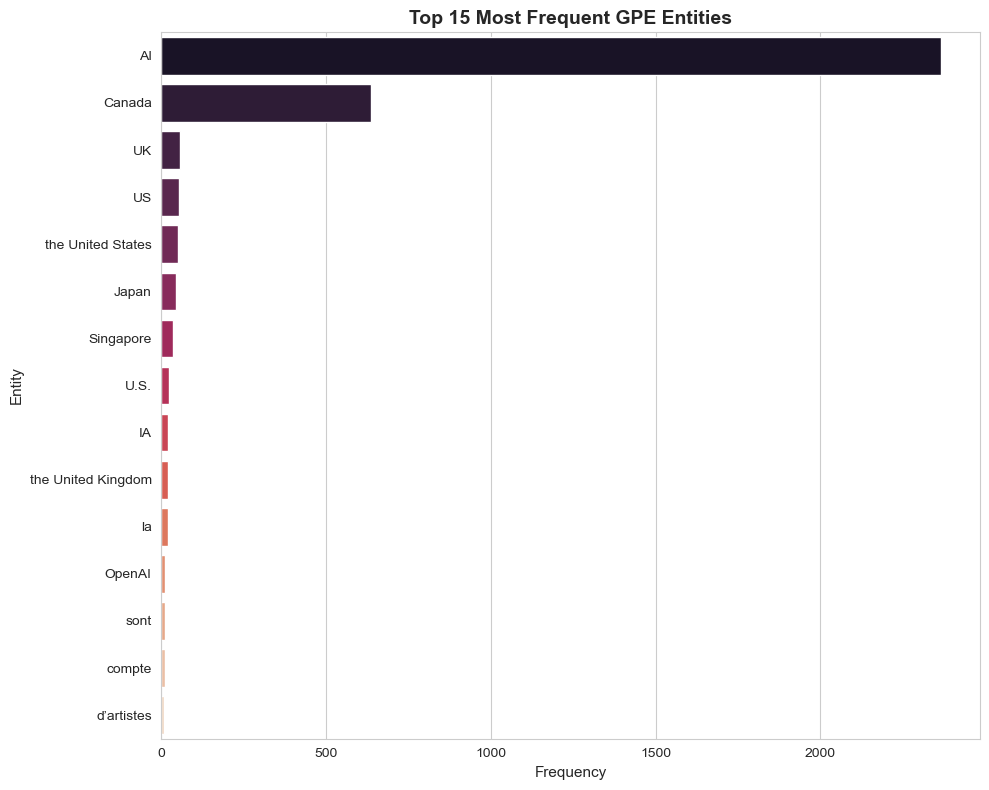

✓ Visualization saved as 'top_gpe_entities.png'


<Figure size 1200x600 with 0 Axes>

In [18]:
# Create plots for main entity types
# You can add or remove types as relevant, such as 'DATE', 'MONEY', etc.
for ent_type in ['PERSON', 'ORG', 'GPE']:  
    if ent_type in df_entities['entity_type'].values:
        plot_top_entities(ent_type)


### Co-occurrence Analysis

Which entities appear together in the same documents?  
This creates a network showing relationships between entities.

In [19]:
# Let first create a resuable function to plot co-occurrence networks
def build_cooccurrence_network(entity_type, top_n=20, min_cooccurrence=2):
    """Build a network of entities that co-occur in documents."""
    
    # Get top entities of this type
    top_entities = (df_entities[df_entities['entity_type'] == entity_type]
                   ['entity_text'].value_counts().head(top_n).index.tolist())
    
    # Find co-occurrences
    cooccurrences = defaultdict(int)
    
    for doc_name, entities_list in entities_by_doc.items():
        # Get entities of target type in this document
        doc_entities = [e[0] for e in entities_list 
                       if e[1] == entity_type and e[0] in top_entities]
        
        # Count co-occurrences
        for i, ent1 in enumerate(doc_entities):
            for ent2 in doc_entities[i+1:]:
                if ent1 != ent2:
                    pair = tuple(sorted([ent1, ent2]))
                    cooccurrences[pair] += 1
    
    # Filter by minimum co-occurrence
    cooccurrences = {k: v for k, v in cooccurrences.items() 
                     if v >= min_cooccurrence}
    
    return cooccurrences

Building co-occurrence network for ORGANIZATION entities...


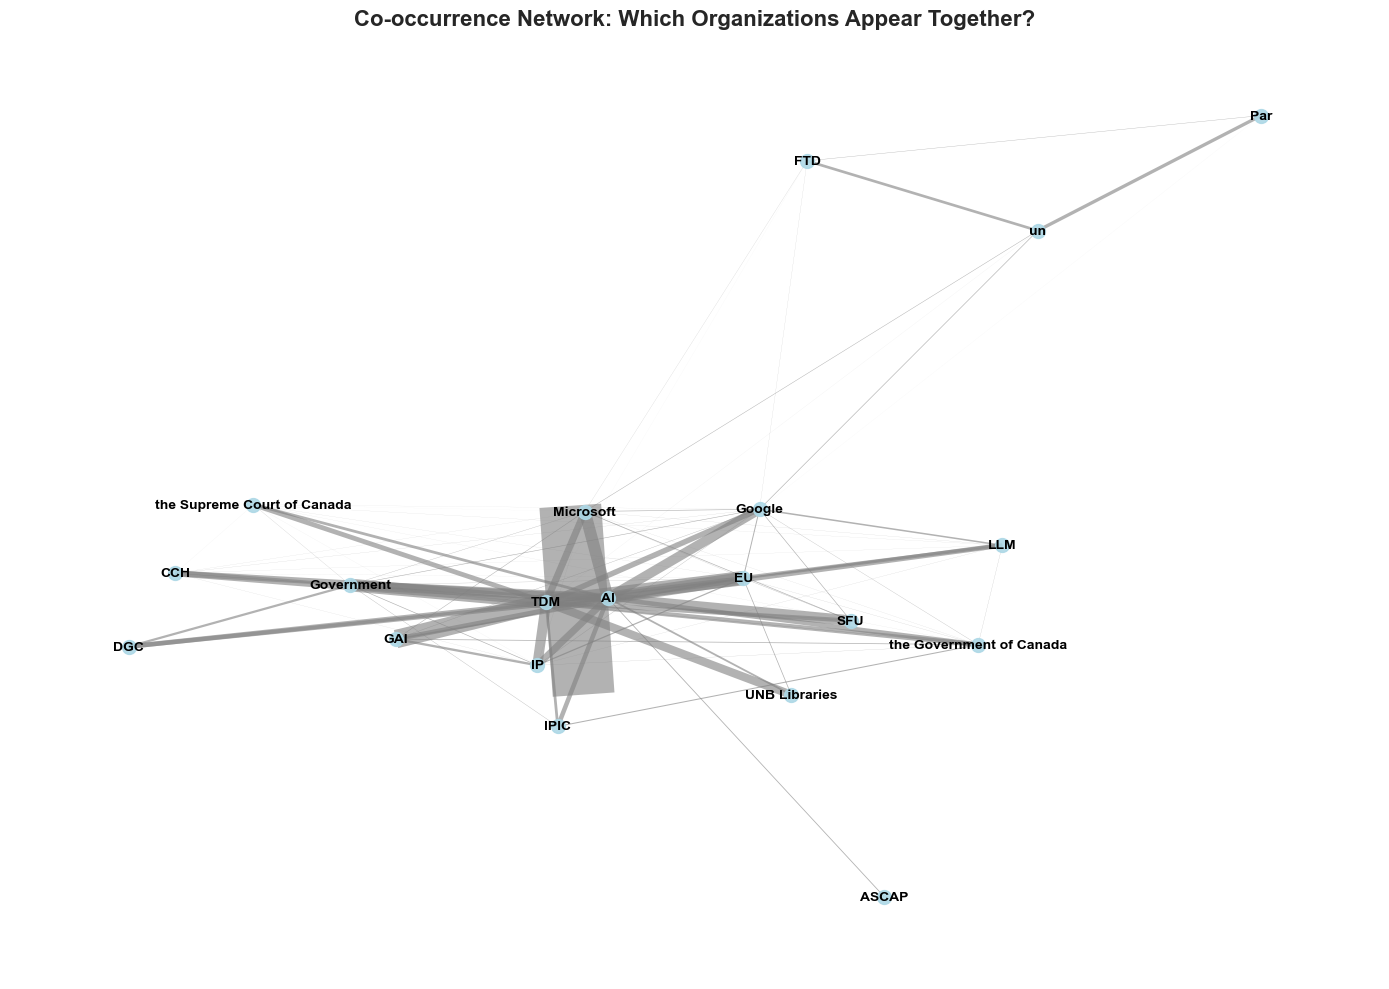

✓ Network visualization saved as 'cooccurrence_network.png'


<Figure size 1200x600 with 0 Axes>

In [20]:
# Create network for ORG entities (change to PERSON, GPE, etc. as needed)
if 'ORG' in df_entities['entity_type'].values:
    print("Building co-occurrence network for ORGANIZATION entities...")
    
    cooccurrences = build_cooccurrence_network('ORG', top_n=20, min_cooccurrence=2)
    
    # Create network graph
    G = nx.Graph()
    
    for (ent1, ent2), weight in cooccurrences.items():
        G.add_edge(ent1, ent2, weight=weight)
    
    # Visualize network
    if len(G.nodes()) > 0:
        plt.figure(figsize=(14, 10))
        pos = nx.spring_layout(G, k=2, iterations=100)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_size=100, 
                              node_color='lightblue', alpha=0.9)
        
        # Draw edges with varying thickness
        edges = G.edges()
        weights = [G[u][v]['weight'] for u, v in edges]
        nx.draw_networkx_edges(G, pos, width=[w*0.01 for w in weights], 
                              alpha=0.6, edge_color='gray')
        
        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
        
        # Add title
        plt.title('Co-occurrence Network: Which Organizations Appear Together?', 
                 fontsize=16, fontweight='bold')
        plt.axis('off')
        
        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()
        
        # Save plot
        plt.savefig(folder_results + 'cooccurrence_network.png', dpi=300, bbox_inches='tight')
        
        print("✓ Network visualization saved as 'cooccurrence_network.png'")
    else:
        print("Not enough co-occurrences to create a network visualization.")

---
## Section 6: Error Analysis - Manual Inspection

### CRITICAL REFLECTION TASK:
Now you need to manually examine some sentences to find where NER fails.

This section helps you randomly sample sentences for manual inspection.

In [21]:
print("\n" + "=" * 80)
print("MANUAL ERROR ANALYSIS")
print("=" * 80)


MANUAL ERROR ANALYSIS


In [22]:
# Lets define a function to sample some sentences for review
def sample_sentences_for_review(n_samples=50):
    """Sample random sentences containing entities for manual review."""
    
    samples = []
    
    # Iterate over rows
    for index, row in df.iterrows():
        doc_name = row['name']
        text = row['full_text']
        
        # Process text with spaCy
        doc = nlp(text)
       
        
        # Get sentences with entities
        for sent in doc.sents:
            if len(list(sent.ents)) > 0:
                entity_info = [(ent.text, ent.label_) for ent in sent.ents]
                samples.append({
                    'document': doc_name,
                    'sentence': sent.text,
                    'entities_found': entity_info
                })
    
    # Random sample
    import random
    if len(samples) > n_samples:
        samples = random.sample(samples, n_samples)
    
    return pd.DataFrame(samples)

# Generate samples for manual review
sample_df = sample_sentences_for_review(n_samples=20)

print(f"\n📝 Sampled {len(sample_df)} sentences for manual review:")


📝 Sampled 20 sentences for manual review:


In [23]:
print("\nFirst 10 samples:")
print("=" * 80)

for idx, row in sample_df.head(10).iterrows():
    print(f"\nDocument: {row['document']}")
    print(f"Sentence: {row['sentence']}")
    print(f"Entities detected: {row['entities_found']}")
    print("-" * 80)


First 10 samples:

Document: University of Waterloo
Sentence: We understand these requirements to mean that content generated by AI is not protected unless an original work is created with the sufficient addition of human skill and judgement.
Entities detected: [('AI', 'GPE')]
--------------------------------------------------------------------------------

Document: Canadian Media Producers Association (CMPA)
Sentence: The Government’s third approach suggests creating a new and unique set of economic rights for AI-generated works to a person who did not provide any original contribution to such works, such as an AI developer, deployer or user.
Entities detected: [('third', 'ORDINAL'), ('AI', 'GPE')]
--------------------------------------------------------------------------------

Document: Bita Amani
Sentence: Adopting the position of IP Scholars submission (2021), the law should continue to limit recognition of authorship to human authors.  
Entities detected: [('IP Scholars', 'ORG'

In [24]:
# Save to CSV for detailed analysis
sample_df.to_csv(folder_results +'sentences_for_manual_review.csv', index=False)
print("\n✓ All samples saved to 'sentences_for_manual_review.csv'")
print("  → Open this file and add columns for:")
print("     - Missed entities (what NER didn't catch)")
print("     - Incorrect classifications (what was wrongly labeled)")
print("     - Notes on why the error occurred")


✓ All samples saved to 'sentences_for_manual_review.csv'
  → Open this file and add columns for:
     - Missed entities (what NER didn't catch)
     - Incorrect classifications (what was wrongly labeled)
     - Notes on why the error occurred


---
## Section 7: Export Results

Export your findings in formats you can reference in your written reflection.

In [25]:
# Create comprehensive summary

summary = {
    'total_documents': df.shape[0],
    'total_entities': len(all_entities),
    'unique_entities': len(df_entities['entity_text'].unique()),
    'entity_type_counts': df_entities['entity_type'].value_counts().to_dict()
}

print("\n" + "=" * 80)
print("SUMMARY STATISTICS FOR YOUR PAPER")
print("=" * 80)
print(f"\nTotal documents analyzed: {summary['total_documents']}")
print(f"Total entity mentions: {summary['total_entities']:,}")
print(f"Unique entities: {summary['unique_entities']:,}")
print("\nEntity type distribution:")
for ent_type, count in summary['entity_type_counts'].items():
    print(f"  {ent_type}: {count:,}")


SUMMARY STATISTICS FOR YOUR PAPER

Total documents analyzed: 103
Total entity mentions: 13,093
Unique entities: 3,244

Entity type distribution:
  ORG: 4,914
  GPE: 3,634
  PERSON: 1,374
  NORP: 785
  CARDINAL: 757
  DATE: 644
  LAW: 429
  ORDINAL: 212
  WORK_OF_ART: 119
  PRODUCT: 51
  FAC: 38
  MONEY: 34
  LOC: 28
  PERCENT: 27
  EVENT: 18
  LANGUAGE: 13
  TIME: 10
  QUANTITY: 6


In [26]:
# Export top entities for each type to CSV
for ent_type in entity_types:
    entities_of_type = df_entities[df_entities['entity_type'] == ent_type]
    if len(entities_of_type) > 0:
        top_entities = entities_of_type['entity_text'].value_counts().head(50)
        top_entities.to_csv(folder_results +f'top_{ent_type.lower()}_entities.csv')

print("\n✓ Detailed results exported to CSV files")


✓ Detailed results exported to CSV files


In [27]:
# Export complete entity list
df_entities.to_csv(folder_results +'all_entities.csv', index=False)
print("✓ Complete entity list saved to 'all_entities.csv'")

✓ Complete entity list saved to 'all_entities.csv'


---
## Section 8: Your Custom Analysis

### STUDENT WORKSPACE:
Use the space below for your own explorations!

#### Ideas:
- Compare entity distributions across different documents
- Look at specific entity combinations (e.g., which ORGs appear with which LOCs?)
- Create custom visualizations
- Filter entities by contributor_type
- Analyze context around specific entities

In [28]:
# YOUR CODE HERE:









---
## Section 9: Reflection Prompts

As you write your reflection, consider these questions:

### PART A - What did NER reveal? (400 words)
- What are the most frequent entities in each category?
- Are there surprising patterns or absences?
- How does entity distribution vary across documents?
- What might this tell us about your corpus?

### PART B - Where did NER fail? (400 words)
Review your manual error analysis:
- What types of entities were missed?
- What was incorrectly classified?
- Look for patterns: Are certain types of names consistently missed?
- Are there cultural, historical, or domain-specific entities NER struggles with?
- What do these failures reveal about the model's training data and assumptions?

### PART C - Critical reflection on categories (400 words)
- Are PERSON, ORG, GPE, LOC, DATE adequate for your research?
- What categories would be useful but are missing?
  - (e.g., ARTWORK, CONCEPT, METHODOLOGY, IDEOLOGY)
- How might gender, race, or class be encoded or erased?
- If you were designing an NER system for humanities, what would you change?

### PART D - Methodological proposal (300 words)
- How could you combine NER with close reading or other methods?
- What research question could this help you answer?
- What would you need to be cautious about?
- What are the ethical implications of automated annotation for your corpus?